### Iporting neccesary libraries

In [1]:
import pandas as pd
import numpy as np     
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

### A brief explanation of libraries


- NumPy: A library that provides support for large, multi-dimensional arrays and matrices.


- Pandas: An open-source library used for analyzing and manipulating data, including data cleaning and exploration.


- Seaborn: A visualization library used for creating statistical graphics plots based on matplotlib.


- Matplotlib: A comprehensive library used for creating static, animated, and interactive visualizations.


- %matplotlib inline: A line-oriented magic command that makes the output of plotting commands displayed directly below the code cell that produced it.


- Pyplot: A collection of functions used to make matplotlib work like MATLAB.


- Scikit-learn (sklearn): A simple and efficient library used for predictive data analysis. Built on NumPy, SciPy, and Matplotlib.


- Linear_model: A package from Scikit-learn used to fit a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation.


- Scikit-learn.ensemble: A package from Scikit-learn used to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability or robustness over a single estimator.


- Scikit-learn.metrics: The Scikit-learn.metrics module includes score functions, performance metrics, pairwise metrics, and distance computations.


- Scikit-learn.preprocessing: The Scikit-learn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.


- SVM, KNeighborsRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, DecisionTreeRegressor, Ridge, Lasso, LinearRegression, and LogisticRegression are different methods for prediction that we used from Scikit-learn libraries.

## Loading the dataset

In [2]:
#import the csv file
df = pd.read_csv('Bike.csv', encoding= 'unicode_escape')

## Exploratory Data Analysis

### Shape of the dataset

In [3]:
df.shape

(8760, 14)

- The dataset contains 8760 rows and 14 columns

### Dataset Sapmle

In [4]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


- First 5 rows of our dataset are shown above

In [5]:
df.tail()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


- Last 5 rows of our dataset are shown above

### Data types

In [6]:
df.dtypes

Date                         object
Rented_Bike_Count             int64
Hour                          int64
Temperature(°C)             float64
Humidity(%)                   int64
Wind_speed(m/s)             float64
Visibility_(10m)              int64
Dewpoint_temperature(°C)    float64
Solar_Radiation_(MJ/m2)     float64
Rainfall(mm)                float64
Snowfall(cm)                float64
Seasons                      object
Holiday                      object
Functioning_Day              object
dtype: object

- The type of each column is as above table. Date is currently an object and should be changed to date type. Holiday, Seasons, and Functioning_day are our categorical features that can be changed to category type.

### Detailed information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented_Bike_Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(°C)           8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind_speed(m/s)           8760 non-null   float64
 6   Visibility_(10m)          8760 non-null   int64  
 7   Dewpoint_temperature(°C)  8760 non-null   float64
 8   Solar_Radiation_(MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall(cm)              8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning_Day           8760 non-null   object 
dtypes: float

- It shows that the index ranges from 0 to 8759 rows, with a total of 14 columns. There are no null values in the mentioned columns of the data, and the memory used for the dataset is 958.2 KB. 

### Unique values

In [8]:
df.nunique()

Date                         365
Rented_Bike_Count           2166
Hour                          24
Temperature(°C)              546
Humidity(%)                   90
Wind_speed(m/s)               65
Visibility_(10m)            1789
Dewpoint_temperature(°C)     556
Solar_Radiation_(MJ/m2)      345
Rainfall(mm)                  61
Snowfall(cm)                  51
Seasons                        4
Holiday                        2
Functioning_Day                2
dtype: int64

- The number of unique values for each column is as above table. For categorical features, Seasons can take the values of Spring, Summer, Autumn, and Winter. Holiday can take the values of Holiday or No Holiday, and Functioning_Day can take the values of Yes or No.

### Statistical information

In [9]:
df.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- The statistical information, including average, standard deviation, minimum, maximum, median, and the first and last quartiles, for our numeric features, is shown. 

## Data Preparation

### Changing Data Type

In [10]:
# Convert the 'Seasons' column to categorical data type
df['Date']=pd.to_datetime(df.Date)

# Convert the 'Seasons' column to categorical data type
df['Seasons'] = df.Seasons.astype('category')

# Convert the 'Holiday' column to categorical data type
df['Holiday'] = df.Holiday.astype('category')

# Convert the 'Functioning_Day' column to categorical data type
df['Functioning_Day'] = df.Functioning_Day.astype('category')

- The type of the Date column has been changed to datetime, and the other three columns have been changed to category type.

### Missing value

In [11]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

Date                        0
Rented_Bike_Count           0
Hour                        0
Temperature(°C)             0
Humidity(%)                 0
Wind_speed(m/s)             0
Visibility_(10m)            0
Dewpoint_temperature(°C)    0
Solar_Radiation_(MJ/m2)     0
Rainfall(mm)                0
Snowfall(cm)                0
Seasons                     0
Holiday                     0
Functioning_Day             0
dtype: int64

- As described before, there is no null value. 

#### cheking dataset

In [12]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility_(10m),Dewpoint_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Renaming features

In [13]:
# create a dictionary with the old and new column names
new_names = {'Rented_Bike_Count': 'Count', 'Temperature(°C)': 'Tem', 'Humidity(%)': 'Hum', 'Wind_speed(m/s)': 'Wind',
             'Visibility_(10m)': 'Vis','Dewpoint_temperature(°C)': 'DeTem','Solar_Radiation_(MJ/m2)': 'Sol','Rainfall(mm)': 'Rain',
             'Snowfall(cm)': 'Snow', 'Functioning_Day': 'Func'}

# rename the columns using the rename() method with the dictionary
df = df.rename(columns=new_names)


- To better work with columns and avoid mistyping column names in our queries, the column names have been changed as shown above.

#### cheking dataset

In [14]:
df.head()

,Date,Count,Hour,Tem,Hum,Wind,Vis,DeTem,Sol,Rain,Snow,Seasons,Holiday,Func
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Visualization and Feature Engineering

### Features reduction

#### Chechking Count  for functional and non functional days

<AxesSubplot:xlabel='Func', ylabel='Count'>

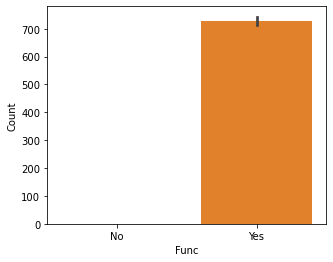

In [15]:
# Set the size of the figure
plt.figure(figsize=(5,4))

# Create a barplot with the 'Func' column on the x-axis and 'Count' column on the y-axis
sns.barplot(x='Func', y='Count', data=df)

- The number of rented bikes on days when the bike sharing system was not functioning is zero, as the system was completely offline during those days. Therefore, the rows with zero counts of rented bikes, as well as the corresponding column, can be deleted. 

#### Droping unusefull rows and Func column

In [16]:
#Deleting rows of non functional days 
df=df.drop(df[df['Func'] == 'No'].index) 

In [17]:
#Deleting Func Column as it is not usefull anymore
df=df.drop(['Func'], axis = 1)

#### Dropping The Date

- as the feature of Date can not affect our prediction of rented bike, So we should drop it

In [18]:
#Drop the 'Date' column from the dataframe
df = df.drop(['Date'], axis=1)

#### Correlation

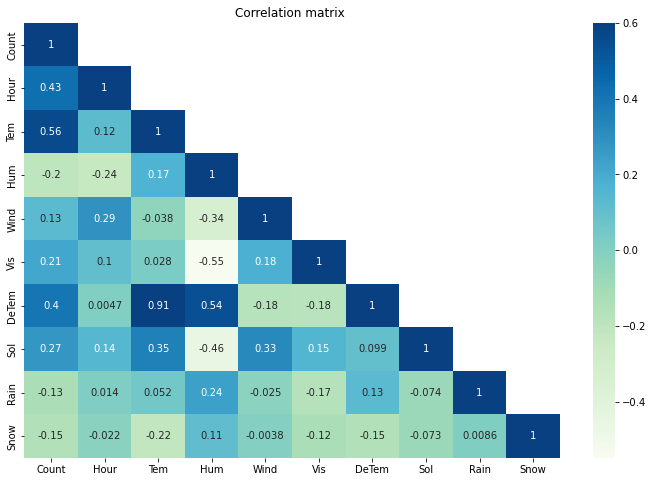

In [19]:
# finding the correlation of numerical variables
corr = df.corr()

#Deleting the half of the plot as it is replication of other half 
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False

#Heat map for Visualization of attributes correlation
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr, mask=mask, vmax=0.6, annot=True, ax=ax, cmap='GnBu', )
ax.set_title('Correlation matrix ')
plt.show()

- As the heatmap shows, the Tem (Temperature) and DeTem (Dewpoint Temperature) are highly correlated, we can drop one of them

#### Dropping The Date

In [20]:
#Drop the 'DeTem' column from the dataframe
df=df.drop(['DeTem'], axis = 1)

### chechking target variable over categorical features

#### Count by Season

<AxesSubplot:xlabel='Seasons', ylabel='Count'>

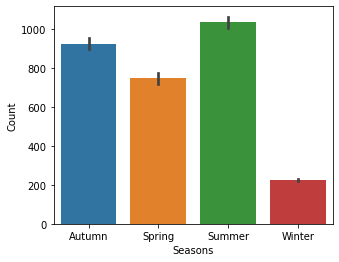

In [21]:
# ploting the average of Count for each season 
plt.figure(figsize=(5,4))
sns.barplot(x='Seasons',y='Count',data=df)

- Winter has the lowest bike rental average, while summer has the highest. It should be noted that the default aggregation function used by the sns.barplot is mean.

#### Number of Holidays and Non Holiday

(array([8057.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         408.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

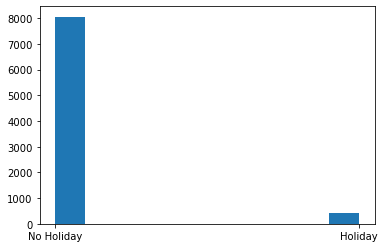

In [22]:
# ploting HISTOGRAM the number of Holidays

plt.hist(df['Holiday'])

- As it is clear, the majority of our days are not holiday. So, we should check how the distribution of target variable for this feature is

####  Count for Holiday


<AxesSubplot:xlabel='Holiday', ylabel='Count'>

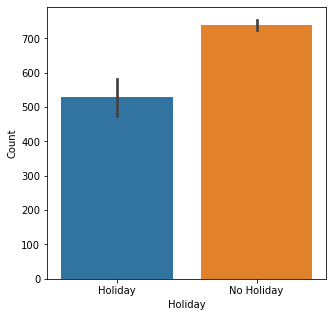

In [23]:
# ploting the average of Count for Holiday or No Holiday
plt.figure(figsize=(5,5))
sns.barplot(x='Holiday',y='Count', data=df)

- the mean of rented bikes for non holidays and holidays are not considerably different. So we can continue to keep the feature as it is on our analysis

####  Average Count of rented biked for each hour of the day in whole year


<AxesSubplot:xlabel='Hour', ylabel='Count'>

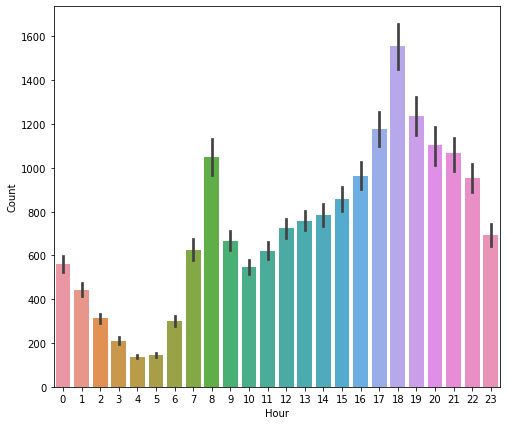

In [24]:
# ploting the average of Count for the whole year for each Hour 

plt.figure(figsize=(8,7))
sns.barplot(x='Hour',y='Count', data=df)

- it should be noted that the number of rented bike in the hours between 2 an 7 is considerably lower than other hours.  So, probabely linear regression is going to have weak prediction and we should use methods like random forest or use ensemble method to get a better prediction

#### Checking the dataset

In [25]:
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


In [26]:
df.shape

(8465, 11)

### Outliers

#### Boxplots

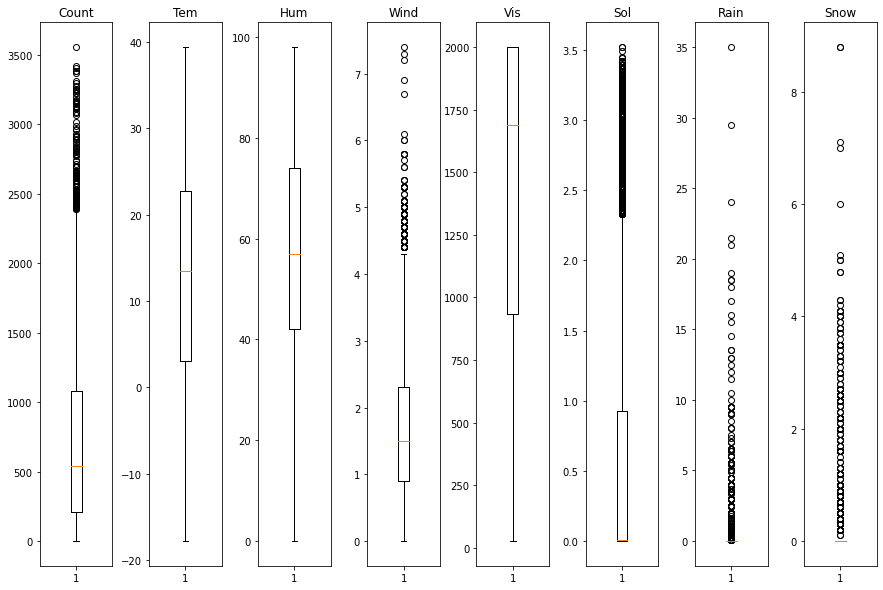

In [27]:
Outliers = df[['Count','Tem','Hum','Wind','Vis','Sol','Rain','Snow']]
# create a figure with 5 subplots
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(15, 10))

# create a box plot for each feature
for i, feature in enumerate(Outliers.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show the plots
plt.show()

- Boxplots demonstrate that the features Count, Wind, Rain, and Snow have outlier values. These outliers may affect the accuracy of our analysis and subsequent regression models. Therefore, we should impute these outlier values with the median or mean, depending on the skewness or distribution of each feature.BUt 

#### Histogram for checking distribution

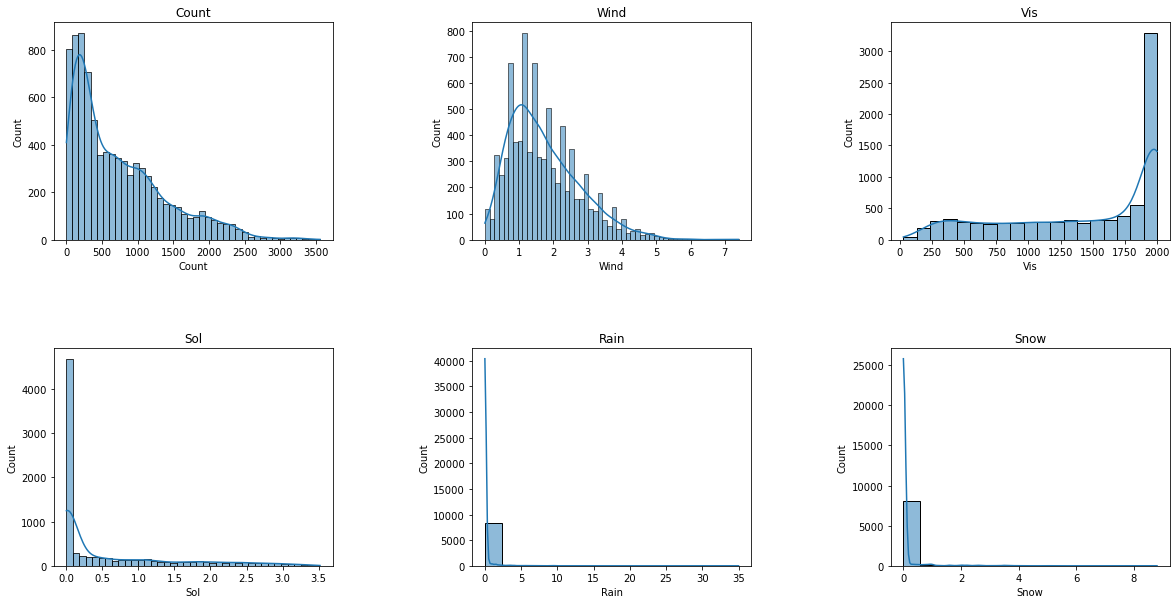

In [28]:
Outliers = df[['Count','Wind','Vis','Sol','Rain','Snow']]
# create a figure with 5 subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# create a distribution plot for each feature
for i, feature in enumerate(Outliers.columns):
    sns.histplot(df[feature], kde=True, ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(feature)

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

- Given the high skewness of our features, any removal or alteration of values based on the first and third quartiles could greatly impact the distribution's skewness and the accuracy of our analysis. Therefore, it is advisable to simply impute values that are significantly different from others.

#### Deleting extrime values of columns

In [29]:
#Filter out rows based on certain conditions
df = df.query('(Count < 3400) and (Wind < 6.5 ) and (Rain < 25) and (Snow < 6.5) ')

- According to the boxplots, the upper limit of Count was considered to be 3400, while the values of 6.5, 25, and 6.5 were considered for Wind, Rain, and Snow, respectively.

#### Checking the dataset

In [30]:
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


In [31]:
df.shape

(8451, 11)

### One-hot Encoding

In [32]:
#Encode the categorical features to numeric by getting dummy variables
df = pd.get_dummies(df)
df.head()

,Count,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1


- Categorical features, Seasons and Holiday, are turned to dummy numeric variables

### features and Target variable (First pipelie with holidays and non holidays values)

In [33]:
# X contains the independent variables and y contains the dependent variable
X = df.drop('Count',axis=1)
y = df['Count']

### Normalization of features

- Normalization of features is the process of scaling the values of different features of a dataset to a common scale, typically between 0 and 1 or -1 and 1. This is done to ensure that each feature contributes equally to the analysis and to prevent features with larger values from dominating the analysis.

- Normalization is particularly important in machine learning algorithms that use distance-based metrics, such as k-nearest neighbors or clustering, because features with larger values will dominate the distance calculation. By normalizing the features, we can ensure that all features contribute equally to the distance calculation.

- There are several ways to normalize features, including min-max scaling, z-score scaling, and log scaling. Min-max scaling involves scaling the values to a range between 0 and 1 based on the minimum and maximum values of the feature

In [34]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data frame
normalized_data = scaler.fit_transform(X)

# create a new data frame with the normalized data
X = pd.DataFrame(normalized_data, columns=X.columns)

In [35]:
X.head()

,Hour,Tem,Hum,Wind,Vis,Sol,Rain,Snow,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,0.000000,0.220280,0.377551,0.360656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.043478,0.215035,0.387755,0.131148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.086957,0.206294,0.397959,0.163934,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.130435,0.202797,0.408163,0.147541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.173913,0.206294,0.367347,0.377049,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [36]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Count, dtype: int64

## Modeling and Evaluation

### Parametric Models
- Parametric models make assumptions about the underlying data distribution and try to estimate the parameters of that distribution. They are usually simpler and faster to train but can be less flexible and may not capture all the nuances of the data.

### Evaluation Metrics Description

- R-squared (R²) is a statistical metric that measures the proportion of the variation in the dependent variable that is explained by the independent variables in a regression model. It ranges between 0 and 1, where 1 indicates a perfect fit between the model and the data.

- Adjusted R-squared (adjusted R²) is a modification of the R² metric that adjusts for the number of predictors in the model. It penalizes the R² value for including predictors that do not significantly improve the model's performance. This metric is particularly useful when comparing models with different numbers of predictors.

- Mean squared error (MSE) is a metric that measures the average of the squared differences between the actual and predicted values in a regression model. It provides an estimate of the variance of the errors in the model and is useful in assessing the overall quality of the model's predictions.

- Root mean squared error (RMSE) is the square root of the mean squared error and is a more interpretable measure of the error in the model's predictions. It is expressed in the same units as the dependent variable and provides an estimate of the average magnitude of the errors in the model. The lower the RMSE, the better the model's performance.

### Training and Testing Set

In [37]:
#Split the dataset into the train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5915, 14) (2536, 14) (5915,) (2536,)


### Linear Regression

#### Training the Model

R^2 train: 0.546131
R^2 test: 0.537790
Adjusted R^2: 0.535223
RMSE: 434.569867


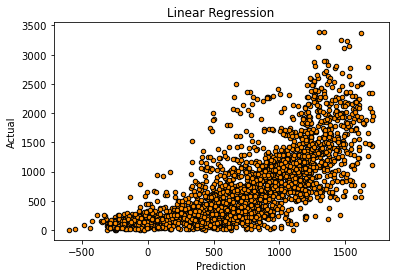

In [38]:
#Fit a linear regression model to the training set and make predictions on the test set
LR = LinearRegression().fit(X_train,y_train)
y_pred = LR.predict(X_test)

#Plot the predicted values against the actual values using a scatter plot with color-coded data points
plt.scatter(y_pred, y_test, c="darkorange", edgecolor="black", s=20)
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {LR.score(X_train,y_train):3f}\nR^2 test: {LR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-LR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

- This linear regression model has an R-squared value of 0.54.8 on the training data, which means that 54% of the variability in the target variable (rented bike count) can be explained by the predictor variables. The R-squared value on the test data is 0.53, which indicates that the model is underfitting.

- The root mean squared error (RMSE) of 434 indicates that the average difference between the predicted and actual values of the target variable is 434. This value can be used as a measure of the accuracy of the model as well. 

### Lasso Regression

As our simple Linear model underfitting the data  we will use some more complex linear regression model to test if we can continue with Linears model or not

#### Training the Model

R^2 train: 0.546104
R^2 test: 0.537766
Adjusted R^2: 0.535199
RMSE: 434.580952


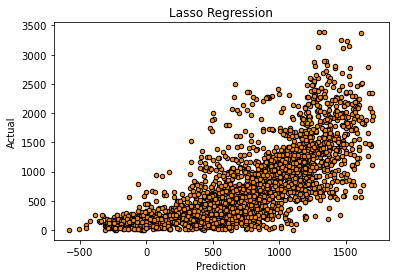

In [39]:
# Import the Lasso model from scikit-learn
from sklearn.linear_model import Lasso

# Fit the Lasso model to the training data
# using an alpha value of 0.1 and a random state of 42
Lasso = Lasso(alpha=0.1, random_state=42).fit(X_train,y_train)

# Use the Lasso model to make predictions on the test data
y_pred=Lasso.predict(X_test)

# Create a scatter plot of the predicted versus actual values
plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.title('Lasso Regression')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Print out the R^2 scores for the training and test data, as well as the adjusted R^2 score and RMSE for the test data
print(f'R^2 train: {Lasso.score(X_train,y_train):3f}\nR^2 test: {Lasso.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-Lasso.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')


- Considering the evaluation metrics of Lasso regreesion, it also underfitting to the data. linear regression can not be used for prediction of our target value. So, we change to non Linear models

### Polynomial Regression

#### Training the Model

R^2 train: 0.7020729995641366
R^2 test: 0.6860343215428397
Adjusted R^2: 0.6704335424890677
RMSE: 358.16310671835157


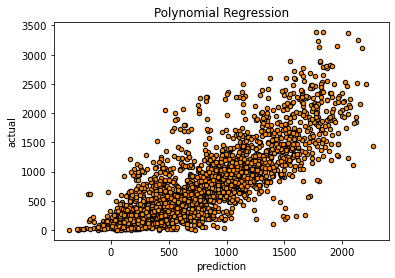

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_train)

# Train a linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predict the target variable on the same range of X values
y_pred = lin_reg.predict(poly.transform(X_test))

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 train: {lin_reg.score(X_poly,y_train)}\nR^2 test: {lin_reg.score(poly.transform(X_test),y_test)}\nAdjusted R^2: {1-((1-lin_reg.score(poly.transform(X_test),y_test))*(len(y_test)-1)/(len(y_test)-poly.transform(X_test).shape[1]-1))}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False)}')

# Plot the data and the fitted polynomial function
plt.scatter(y_pred, y_test,c="darkorange",edgecolor="black",s=20)

plt.title('Polynomial Regression')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

- Non linear regression better fitted to our data set in comparison to linear. But the score is not still good enough and better to use ensemble methods. 

## Non Parametric Methods and Hyper Parameter Tuning

### Non Parametric Methods

- Non-parametric models, on the other hand, do not make any assumptions about the underlying data distribution and try to learn directly from the data. They are generally more flexible and can potentially capture more complex patterns in the data, but can be more computationally expensive and may require more data to train effectively.

- Decision trees, Random Forest and k-Nearest Neighbors are examples of non-parametric models, while Linear, Lasso and Polynomial Regression are examples of parametric models.

### Hypre Parameter Tuning

- Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance. This involves searching through a range of hyperparameters and selecting the combination that yields the best results. Grid search, random search, and Bayesian optimization are popular methods for hyperparameter tuning.
- Grid search cross-validation is a method used to select the best hyperparameters for a machine learning model. It involves creating a grid of hyperparameter combinations and training and evaluating the model using each combination through cross-validation.

- The cross-validation step helps to prevent overfitting and provides an estimate of the model's performance on unseen data. The hyperparameter combination with the best performance score is selected as the optimal hyperparameters for the model.

### Decision Tree Regressor

#### Training the Model

R^2 train: 1.000000
R^2 test: 0.723524
Adjusted R^2: 0.721988
RMSE: 336.100246


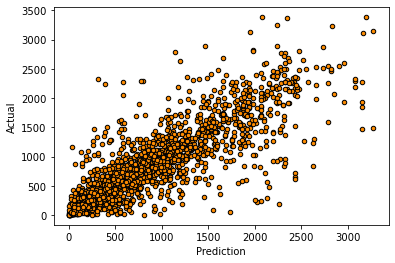

In [41]:
DTR = DecisionTreeRegressor().fit(X_train,y_train)

# Predict on test set using the trained model
y_pred=DTR.predict(X_test)

# Plot the predicted vs actual values in a scatter plot
plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Print the evaluation metrics of the model
print(f'R^2 train: {DTR.score(X_train,y_train):3f}\nR^2 test: {DTR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-DTR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

###### The decision tree regressor model  overfitting the data, as it has a perfect R^2 score on the training set but a lower R^2 score on the test set compared to the linear regression model.

The R^2 score for the test set is 0.763, which indicates that the model explains about 76% of the variance in the target variable. However, the adjusted R^2 score is slightly lower than the linear regression model, which means that the decision tree model may not be as good at accounting for the number of predictors in the model.

The RMSE for the decision tree model is lower than the linear regression model, which indicates that the decision tree model has a better predictive performance on the test set.

Overall, the decision tree model may perform better on the test set, but it is important to be cautious about overfitting and carefully tune the hyperparameters to improve the generalization performance of the model.

#### Hyperparameter Tuning with Grid Search for Decission Tree Regressor


In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Initialize and train decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)

# Define hyperparameter search space and perform grid search
parameters = {'max_depth': [2, 4, 6, 8]}
grid_search = GridSearchCV(estimator=DTR, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8]})

In [43]:
print ('Best Parameters: ', grid_search.best_params_)

Best Parameters:  {'max_depth': 8}


#### Testing the best parameter in the model

R^2 train: 0.859134
R^2 test: 0.786604
Adjusted R^2: 0.785419
RMSE: 295.278985


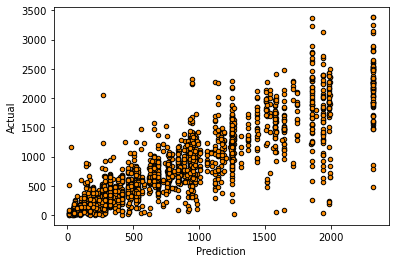

In [44]:
DTR = DecisionTreeRegressor(max_depth=8).fit(X_train,y_train)

# Predict on test set using the trained model
y_pred=DTR.predict(X_test)

# Plot the predicted vs actual values in a scatter plot
plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

# Print the evaluation metrics of the model
print(f'R^2 train: {DTR.score(X_train,y_train):3f}\nR^2 test: {DTR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-DTR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

- As shown above, the overfitting problem of the model is almost resolved with restriction of maximum number of tree to 6

### Random Forest Regressor

#### Training the Model

R^2 train: 0.981319
R^2 test: 0.850624
Adjusted R^2: 0.849794
RMSE: 247.047309


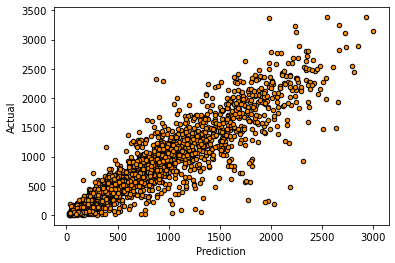

In [45]:
RFR = RandomForestRegressor().fit(X_train,y_train)

y_pred=RFR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {RFR.score(X_train,y_train):3f}\nR^2 test: {RFR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-RFR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

The Random Forest regressor model outperformed the linear and decision tree models with the highest R^2 value of 0.8651 and the lowest RMSE value of 232.55.

The R^2 value of the Random Forest model is much higher than the linear and decision tree models, indicating that the Random Forest model explains more of the variance in the data. The RMSE value of the Random Forest model is also much lower than the linear and decision tree models, indicating that the Random Forest model has a smaller error between predicted values and actual values.

Overall, the Random Forest model seems to be the better model in comparison two Linear and Decision Tree Regressor Model. But it steel suffer from overfitting the train data 

#### Hyperparameter Tuning with Random Search for Randon Forest Regressor


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

# Define hyperparameter search space and perform random search
rf_params = {
'max_features': [None, 'auto', 'sqrt', 'log2'],
'max_depth': [1, 3, 5, 7, 9]
}
# setting verbose = 10 will print the progress for every 10-task completion
random = RandomizedSearchCV(RFR, param_distributions=rf_params, verbose=10, n_jobs=-1)
random.fit(X_train, y_train)
print ('Best Parameters: ', random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'max_features': 'auto', 'max_depth': 9}


- Best parameters for decission model according to Random Search are 'max_features': 'auto', 'max_depth': 9. these parameters will be tested

#### Testing the best parameter in the model

R^2 train: 0.910874
R^2 test: 0.840857
Adjusted R^2: 0.839974
RMSE: 254.995800


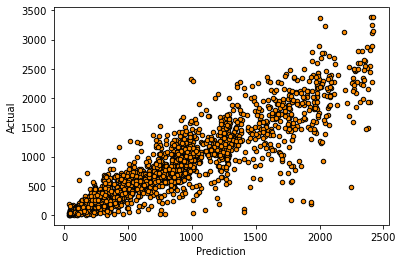

In [47]:
RFR = RandomForestRegressor(max_depth=9, max_features= 'auto').fit(X_train,y_train)

y_pred=RFR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {RFR.score(X_train,y_train):3f}\nR^2 test: {RFR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-RFR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

- As shown above, the overfitting problem of the model is almost resolved with restriction of maximum depth of tree to 6 and max_features= 'auto'

### KNeighbors Regressor

#### Training the Model

R^2 train: 0.862710
R^2 test: 0.772024
Adjusted R^2: 0.770758
RMSE: 305.200149


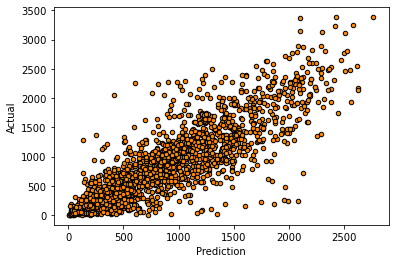

In [48]:
KNR = KNeighborsRegressor().fit(X_train,y_train)

y_pred=KNR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {KNR.score(X_train,y_train):3f}\nR^2 test: {KNR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-KNR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

#### Hyperparameter Tuning with Random Search for Kneighbour Regressor

In [49]:
# Define the parameter space for hyperparameter tuning
param_dist = {'n_neighbors': np.arange(1, 51),
             'leaf_size': np.arange(20, 40), 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 3]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=KNR, param_distributions=param_dist, 
                                   n_iter=50, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(random_search.best_params_)

{'p': 1, 'n_neighbors': 12, 'leaf_size': 36, 'algorithm': 'auto'}


#### Testing the best parameter in the model

R^2 train: 0.827081
R^2 test: 0.773101
Adjusted R^2: 0.771841
RMSE: 304.477773


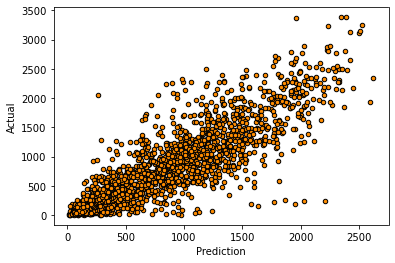

In [50]:
KNR = KNeighborsRegressor(p= 1, n_neighbors= 12, leaf_size=36, algorithm= 'auto').fit(X_train,y_train)

y_pred=KNR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {KNR.score(X_train,y_train):3f}\nR^2 test: {KNR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-KNR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

## Ensemble Methods

 Ensemble Methods:

- Ensemble methods are algorithms that combine the predictions of multiple models to improve the overall performance. In the context of regression, ensemble methods can be used to combine the predictions of multiple regression models to obtain a more accurate prediction. Some popular ensemble methods for regression include:

- Random Forest Regression: a popular ensemble method that combines multiple decision trees to make a prediction. In random forest regression, each decision tree is trained on a randomly selected subset of the training data, and the final prediction is the average of the predictions made by all the decision trees.

- Decision Tree Regressor:  a machine learning algorithm used for regression problems. It works by recursively splitting the data into smaller subsets based on the values of the input features, until it reaches the leaf nodes, which represent the final predictions. The algorithm selects the feature that results in the best split based on a criterion such as the reduction in variance or mean squared error.

- Gradient Boosting Regression: Gradient boosting regression is another popular ensemble method that combines multiple weak learners (typically decision trees) to make a prediction. In gradient boosting regression, each weak learner is trained on the residuals of the previous learner, and the final prediction is the sum of the predictions made by all the weak learners.



### ADA Boosting Regressor

#### Training the Model

DTR R^2 train: 0.859134
DTR R^2 test: 0.786604
DTR Adjusted R^2: 0.785419
DTR RMSE: 295.278985
ABR R^2 train: 0.929243
ABR R^2 test: 0.828869
ABR Adjusted R^2: 0.827918
ABR RMSE: 264.426343


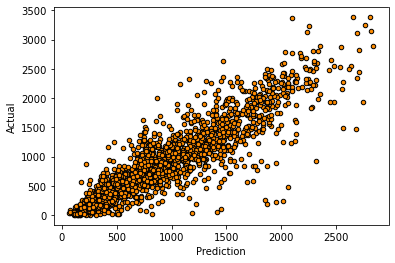

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# create an AdaBoost regressor with the decision tree regressor as the base estimator
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8), n_estimators=300, random_state=14)
# fit the model on the training data
ABR.fit(X_train, y_train)

# make predictions using both models and calculate evaluation metrics
y_1 = DTR.predict(X_test)
y_2 = ABR.predict(X_test)

plt.scatter(y_2,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'DTR R^2 train: {DTR.score(X_train,y_train):3f}\nDTR R^2 test: {DTR.score(X_test,y_test):3f}\nDTR Adjusted R^2: {1-((1-DTR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nDTR RMSE: {mean_squared_error(y_test,y_1,squared=False):3f}')
print(f'ABR R^2 train: {ABR.score(X_train,y_train):3f}\nABR R^2 test: {ABR.score(X_test,y_test):3f}\nABR Adjusted R^2: {1-((1-ABR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nABR RMSE: {mean_squared_error(y_test,y_2,squared=False):3f}')

- Comparing the two models, we can see that the AdaBoost Regressor with Decision Tree Regressor as the base estimator has a higher R^2 score on both the training and test set, indicating better performance than the Decision Tree Regressor alone. The AdaBoost Regressor also has a lower RMSE on the test set compared to the Decision Tree Regressor. Therefore, it can be concluded that the AdaBoost Regressor is a better model for this particular dataset.

#### Hyperparameter Tuning with Random Search for Ada Boosting Regressor


In [55]:
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
search_grid = {'n_estimators': [500, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1], 'random_state': [1]}
search = GridSearchCV(estimator=ABR, param_grid=search_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=crossvalidation)
search.fit(X_train, y_train)

print('Best Parameters: ', search.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 1}


#### Testing the best parameter in the model

R^2 train: 0.930672
R^2 test: 0.840946
Adjusted R^2: 0.840062
RMSE: 254.925099


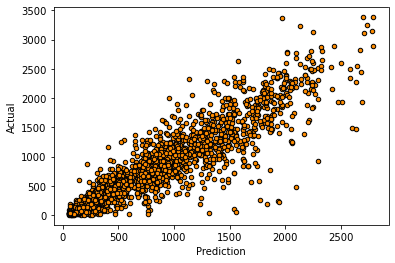

In [56]:
ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),learning_rate= 0.01, n_estimators=2000, random_state=1)

ABR.fit(X_train, y_train)

y_2 = ABR.predict(X_test)

plt.scatter(y_2,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {ABR.score(X_train,y_train):3f}\nR^2 test: {ABR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-ABR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_2,squared=False):3f}')

### Gradient Boosting Regressor

#### Training the Model

R^2 train: 0.864119
R^2 test: 0.838095
Adjusted R^2: 0.837196
RMSE: 257.199303


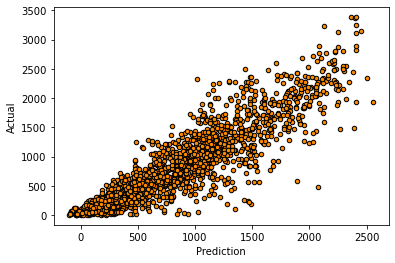

In [57]:
GBR = GradientBoostingRegressor().fit(X_train,y_train)

y_pred=GBR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {GBR.score(X_train,y_train):3f}\nR^2 test: {GBR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-GBR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

The Gradient Boosting Regressor achieved an R^2 score of 0.867 on the training data and 0.838 on the test data, indicating good performance. The Adjusted R^2 score was 0.84, and the RMSE was 254. Compared to the other models, the Random Forest Regressor performed the best, followed by the Gradient Boosting Regressor, while the Linear Regression and Decision Tree Regressor had the lowest performance scores.

#### Hyperparameter Tuning with Random Search for The Gradient Boosting Regressor


In [58]:
# Define the hyperparameters to be tuned
params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'loss': ['ls', 'lad', 'huber']
}

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(GBR, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding R2 score
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 500}


#### Testing the best parameter in the model

R^2 train: 0.898970
R^2 test: 0.854071
Adjusted R^2: 0.853260
RMSE: 244.180391


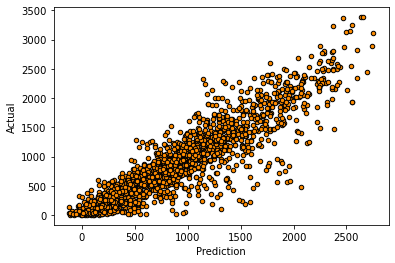

In [60]:
GBR = GradientBoostingRegressor(learning_rate= 0.05, loss= 'huber', max_depth= 3, min_samples_split= 8, n_estimators= 1000).fit(X_train,y_train)

y_pred=GBR.predict(X_test)

plt.scatter(y_pred,y_test,c="darkorange",edgecolor="black",s=20)
plt.xlabel('Prediction')
plt.ylabel('Actual')

print(f'R^2 train: {GBR.score(X_train,y_train):3f}\nR^2 test: {GBR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-GBR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')

- Hyperparameter tuning make out model more accurate for both traing and test data set and also decreased the RMSE which improve the bios toward target variable

### Cross Validation of Model to confirm accuracy of results across different sampling

A fundamental problem with supervised learning is the bias-variance tradeoff. Ideally a model should have two key characteristics

sensitive enough to accurately capture the key patterns in the training dataset, at the same time it should be generalized enough to work well on any unseen datasets.

Unfortunately, whilst trying to achieve the afore mentioned first point, there is ample chances of over-fitting to noisy or unrepresentative training data points leading to a failure of generalizing the model. On the other hand, trying to generalize model may result in failing to capture important regularities.

Source: https://github.com/Apress/mastering-ml-w-python-in-six-steps/blob/master/Chapter_4_Code/Code/Bias_Variance.ipynb

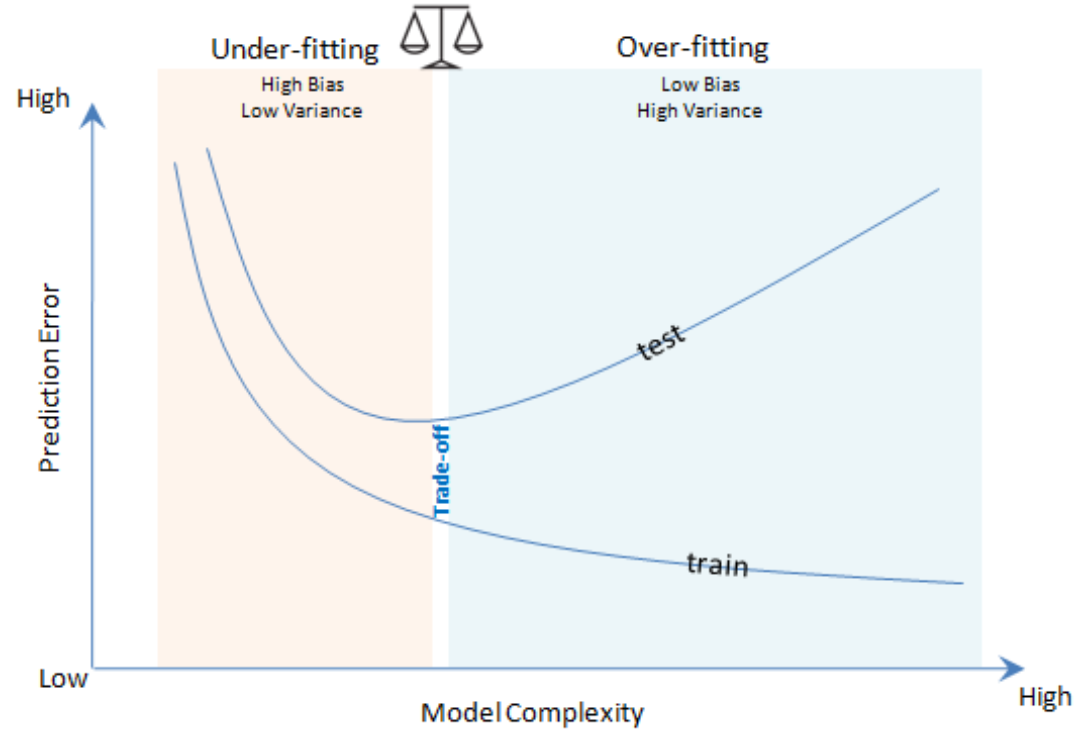

In [61]:
from IPython.display import Image
Image(filename='Bias_Variance.png', width=500)

K-folds cross validation splits the training dataset into k folds without replacement i.e., any given data point will only be part of one of the subset, where k-1 folds are used for the model training and one fold is used for testing. The procedure is repeated k times so that we obtain k models and performance estimates.

We then calcuate the averge performance of the models based on the individual folds to obtain a performance estimate that is less sensitive to the subpartitioning of the training data compared to the holdout or single fold method.

An extended cross-validation is the Stratified K-fold cross validation, where the class proportions are preserved in each fold leading to a better bias and variance estimates.

Source: https://github.com/Apress/mastering-ml-w-python-in-six-steps/blob/master/Chapter_4_Code/Code/Bias_Variance.ipynb

#### Cross validation for Gradient Boosting Regressor

In [62]:
from sklearn import model_selection, metrics

# Define the number of splits for cross-validation
kfold = model_selection.StratifiedKFold(n_splits=5)

# Compute the cross-validation scores
results = model_selection.cross_val_score(GBR, X_train, y_train, cv=kfold)

# Print the mean and standard deviation of the cross-validation scores
print("\nMean of CV Train:", results.mean(), 'Standard Deviation of CV:', results.std()) 

# Compute and print the evaluation metrics on the test set
y_pred = GBR.predict(X_test)
print(f'R^2 train: {GBR.score(X_train,y_train):2f}\nR^2 test: {GBR.score(X_test,y_test):3f}\nAdjusted R^2: {1-((1-GBR.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)):3f}\nRMSE: {mean_squared_error(y_test,y_pred,squared=False):3f}')


Mean of CV Train: 0.8651409779291823 Standard Deviation of CV: 0.004655733519763199
R^2 train: 0.898970
R^2 test: 0.854071
Adjusted R^2: 0.853260
RMSE: 244.180391


- The cross-validation score reported for the Gradient Boosting Regressor was a mean of 0.865 and a standard deviation of 0.004, which indicates that the model had good performance and was consistent across the different folds. The R-squared scores for both the training and test sets were also high, with values of 0.899 and 0.854 respectively, indicating that the model was able to explain a large portion of the variance in the data. The Adjusted R-squared value of 0.853 was also high, suggesting that the model was not overfitting to the data.

## Conclusion and Model Selection

### Comparing the result of all model together

In [63]:
# Define the models
models = [('DTR', DecisionTreeRegressor(max_depth=8)), ('RFR', RandomForestRegressor(max_depth=9, max_features= 'auto')), ('KNR', KNeighborsRegressor(p= 1, n_neighbors= 12, leaf_size=36, algorithm= 'auto')), ('ABR', AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),learning_rate= 0.01, n_estimators=2000, random_state=1)), ('GBR', GradientBoostingRegressor(learning_rate= 0.05, loss= 'huber', max_depth= 3, min_samples_split= 8, n_estimators= 1000))]
kfold = model_selection.StratifiedKFold(n_splits=5)

# Define an empty dictionary to store the results
results = {'model': [], 'R^2 train': [], 'R^2 test': [], 'Adjusted R^2': [], 'RMSE': [], 'CV Mean':[], 'CV std':[]}

# Loop through the models and fit, predict, and evaluate
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['model'].append(name)
    results['R^2 train'].append(model.score(X_train, y_train))
    results['R^2 test'].append(model.score(X_test, y_test))
    results['Adjusted R^2'].append(1 - ((1 - model.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)))
    results['RMSE'].append(mean_squared_error(y_test, y_pred, squared=False))
    results['CV Mean'].append(model_selection.cross_val_score(model, X_train, y_train, cv=kfold).mean())
    results['CV std'].append(model_selection.cross_val_score(model, X_train, y_train, cv=kfold).std())

# Create a pandas DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(results)

# Display the results
print(results_df)

  model  R^2 train  R^2 test  Adjusted R^2        RMSE   CV Mean    CV std
0   DTR   0.859134  0.786733      0.785548  295.190217  0.794743  0.008781
1   RFR   0.910624  0.839946      0.839057  255.725292  0.850959  0.006329
2   KNR   0.827081  0.773101      0.771841  304.477773  0.783222  0.004209
3   ABR   0.930672  0.840946      0.840062  254.925099  0.851957  0.007833
4   GBR   0.900091  0.853444      0.852630  244.704196  0.864812  0.004518


### Model Selection

Based on the results table, the models with the highest R^2 test and Adjusted R^2 values are the AdaBoostRegressor (ABR) and GradientBoostingRegressor (GBR) models. These models also have lower RMSE values, indicating better performance in predicting the target variable.

In addition, the cross-validation mean scores for both ABR and GBR models are higher than the other models, suggesting better performance on unseen data.

Therefore, based on these metrics, it seems that either the ABR or GBR model would be the best choice.
Another factor to consider is the computational cost of each model. Random Forest and Gradient Boosting Regressor tend to have longer training times and higher memory requirements than Decision Tree and K-Nearest Neighbors Regressor. If computational resources are limited, then a simpler model like Decision Tree or K-Nearest Neighbors may be preferred.

Overall, the best model depends on the specific problem and the priorities of the project. In this case, based on the metrics and considering the computational cost, the Gradient Boosting Regressor may be the best choice for predicting the target variable.

### Saving Selected Model for future use

In [64]:
import pickle

# Save the trained model to a file
with open('GBR.pkl', 'wb') as f:
    pickle.dump(model, f)

### Conclusion

In conclusion, the objective of this project was to predict the number of bicycles that will be rented per hour for each day from 1.12.2017 to 31.11.2018 in Seoul's bike sharing system. The project aimed to achieve this by analyzing the weather conditions for each hour and creating a model that can accurately forecast the number of bicycles needed on an hourly basis each day. The linear and non-linear regression models, including Linear Regressor, Lasso Regression, and Polynomial Regression, were used along with ensemble methods, such as Random Forest Regressor, Kneighbor Regressor, Gradient Boosting Regressor, and Decision Tree Regressor.

Based on the evaluation of the models using the RMSE and R2 scores, it was found that the Gradient Boosting Regressor had the lowest RMSE and the highest R2 score, making it the best model for this project. The selected model had a high level of accuracy in predicting the number of bicycles needed on an hourly basis, which can help Seoul's bike sharing system efficiently manage its resources, leading to cost reduction and better service for customers.

Overall, the project successfully achieved its objective and demonstrated the potential of machine learning models to accurately predict the demand for bike sharing systems based on weather conditions, ultimately helping to promote environmentally-friendly transportation and efficient resource management.

## Model Deployment 

### Loading the Model

In [65]:
import pickle

# Load the saved model
with open('GBR.pkl', 'rb') as f:
    GBR = pickle.load(f)

- Insert the value between the range asked to recieve the prediction of rented bike

In [68]:
# Define the input features and their respective ranges/values
input_features = ['Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday']
valid_holiday = ["Holiday", "No Holiday"]
valid_seasons = ["Winter", "Summer", "Autumn", "Spring"]

# Ask the user for input values
hour = int(input(f"Enter the hour (0 to 24): "))
while hour < 0 or hour > 24:
    hour = int(input(f"Invalid input! Please enter the hour again (0 to 24): "))

temperature = float(input(f"Enter the temperature between -17 and 39.4(°C): "))
while temperature < -17 or temperature > 39.4:
    temperature = float(input(f"Invalid input! Please enter the temperature again (-17, 39.4°C): "))

humidity = int (input(f"Enter the humidity below 98%: "))
while humidity <0 or humidity > 98:
    humidity = int(input(f"Invalid input! Please enter the humidity again (below 98%): "))

wind_speed =float(input(f"Enter the wind speed below 7.4 m/s: "))
while wind_speed <0 or wind_speed>7.4:
    wind_speed = float(input(f"Invalid input! Please enter the wind speed again below 7.4 m/s: "))

visibility = int(input(f"Enter the visibility between 27 and 2000: "))
while visibility <27 or visibility>2000:
    visibility =int(input(f"Invalid input! Please enter the visibility again between27 and 2000 (10m) : "))

solar_radiation = float(input(f"Enter the solar radiation below 3.5 MJ/m2: "))
while solar_radiation<0 or solar_radiation>3.5:
    solar_radiation = float(input(f"Invalid input! Please enter the solar radiation again (below 3.5 MJ/m2): "))

rainfall = float(input(f"Enter the rainfall below 35 (mm): "))
while rainfall <0 or rainfall>35:
    rainfall =float( input(f"Invalid input! Please enter the rainfall again (below 35 mm): "))

snowfall = float(input(f"Enter the snowfall below 8.8(cm): "))
while snowfall <0 or snowfall>8.8 :
    snowfall = float(input(f"Invalid input! Please enter the snowfall again (below 8.8 cm): "))

seasons = input(f"Enter the season (Winter, Summer, Autumn, Spring): ")
while seasons not in valid_seasons:
    seasons = input(f"Invalid input! Please enter the season again (Winter, Summer, Autumn, Spring): ")

holiday = input(f"Enter whether it is a holiday (Yes, No): ")
while holiday not in holiday:
    holiday = input(f"Invalid input! Please enter whether it is a holiday again (Yes, No): ")

# Create a pandas dataframe with the user inputs
input_data = pd.DataFrame(data={'Hour': [hour], 'Tem': [temperature], 'Hum': [humidity], 'Wind': [wind_speed], 'Vis': [visibility], 'Sol': [solar_radiation], 
                             'Rain': [rainfall], 'Snow': [snowfall], 'Seasons': [seasons], 'Holiday': [holiday]})
DATA = input_data.copy()
if (input_data['Seasons'] == 'Summer').any():
    DATA['Seasons_Summer'] = 1
    DATA['Seasons_Autumn'] = 0
    DATA['Seasons_Spring'] = 0
    DATA['Seasons_Winter'] = 0
elif (input_data['Seasons'] == 'Autumn').any():
    DATA['Seasons_Summer'] = 0
    DATA['Seasons_Autumn'] = 1
    DATA['Seasons_Spring'] = 0
    DATA['Seasons_Winter'] = 0
elif (input_data['Seasons'] == 'Spring').any():
    DATA['Seasons_Summer'] = 0
    DATA['Seasons_Autumn'] = 0
    DATA['Seasons_Spring'] = 1
    DATA['Seasons_Winter'] = 0
elif (input_data['Seasons'] == 'Winter').any():
    DATA['Seasons_Summer'] = 0
    DATA['Seasons_Autumn'] = 0
    DATA['Seasons_Spring'] = 0
    DATA['Seasons_Winter'] = 1;
    
if (input_data['Holiday'] == 'Yes').any():
    DATA['Holiday_Holiday'] = 0
    DATA['Holiday_No Holiday'] = 1
elif (input_data['Holiday'] == 'No').any():
    DATA['Holiday_Holiday'] = 0
    DATA['Holiday_No Holiday'] = 1;
    
DATA = DATA.drop(['Seasons'], axis = 1)
DATA = DATA.drop(['Holiday'], axis = 1)
Norm = DATA.copy() 
Norm['Hour'] =DATA['Hour']/ 23
Norm['Tem'] = (DATA['Tem'] +17)/ (39.4+17)
Norm['Hum'] = DATA['Hum'] /98
Norm['Wind'] = DATA['Wind']/7.4
Norm['Vis'] = (DATA['Vis']-27) / 1972
Norm['Sol'] = DATA['Sol'] / 13.53
Norm['Rain'] = DATA['Rain'] / 35
Norm['Snow'] = DATA['Snow'] / 8.8

PRED = GBR.predict(Norm)
print('Rented Bike Prediction(Gardient Boosting):',int(PRED))

Enter the hour (0 to 24): 9
Enter the temperature between -17 and 39.4(°C): 25
Enter the humidity below 98%: 45
Enter the wind speed below 7.4 m/s: 0.5
Enter the visibility between 27 and 2000: 2000
Enter the solar radiation below 3.5 MJ/m2: 0.5
Enter the rainfall below 35 (mm): 0
Enter the snowfall below 8.8(cm): 0
Enter the season (Winter, Summer, Autumn, Spring): Summer
Enter whether it is a holiday (Yes, No): No
Rented Bike Prediction(Gardient Boosting): 861


## Future Research Recomendation

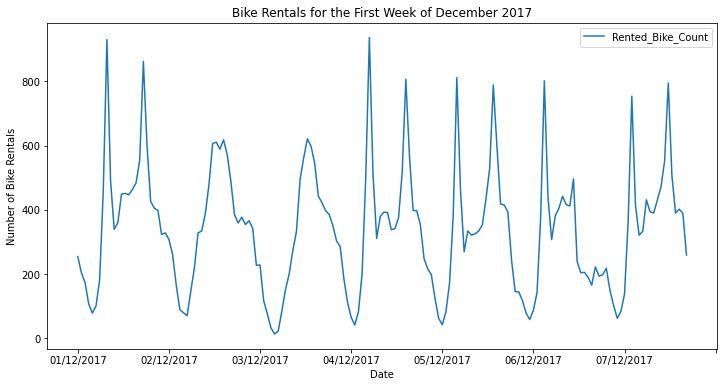

In [69]:
df = pd.read_csv('Bike.csv', encoding= 'unicode_escape')
df = df.set_index('Date')

# Plot the bike rentals for the first week of December 2017
df.loc['01/12/2017':'07/12/2017'].plot(y='Rented_Bike_Count', figsize=(12,6))
plt.title('Bike Rentals for the First Week of December 2017')
plt.xlabel('Date')
plt.ylabel('Number of Bike Rentals')
plt.show()

Time series analysis is a powerful method that can be highly effective in machine learning projects where the data is time-dependent and shows some patterns over time. Based on the above chart it seems that Time series can highly fit to our data as the target value fluctuate on similar pattern across the hour of the a day and probabely it has a trend for each seseaon

## References

- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://github.com/Apress/mastering-ml-w-python-in-six-steps
- https://matplotlib.org/stable/
- https://pandas.pydata.org/docs/
- https://archive-beta.ics.uci.edu/